In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv("heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# Data Preprocessing

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# making new data frame with dropped NA values
data = df
new_data = data.dropna(axis=0, how='any')

# comparing sizes of data frames
print("Old data frame length:", len(data),
      "\nNew data frame length:",
      len(new_data),
      "\nNumber of rows with at least")

Old data frame length: 303 
New data frame length: 303 
Number of rows with at least


Correlation Matrix

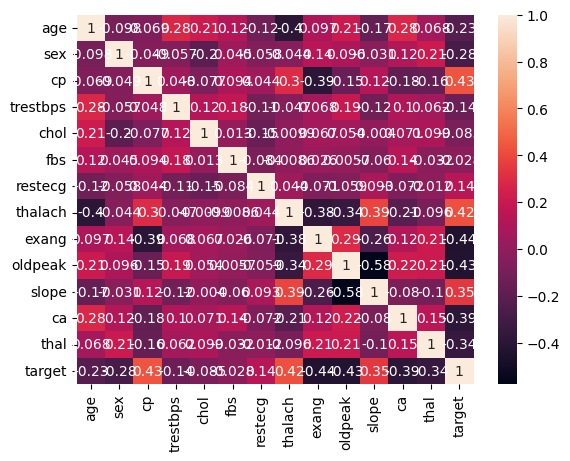

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (150, 120)
plt.show()

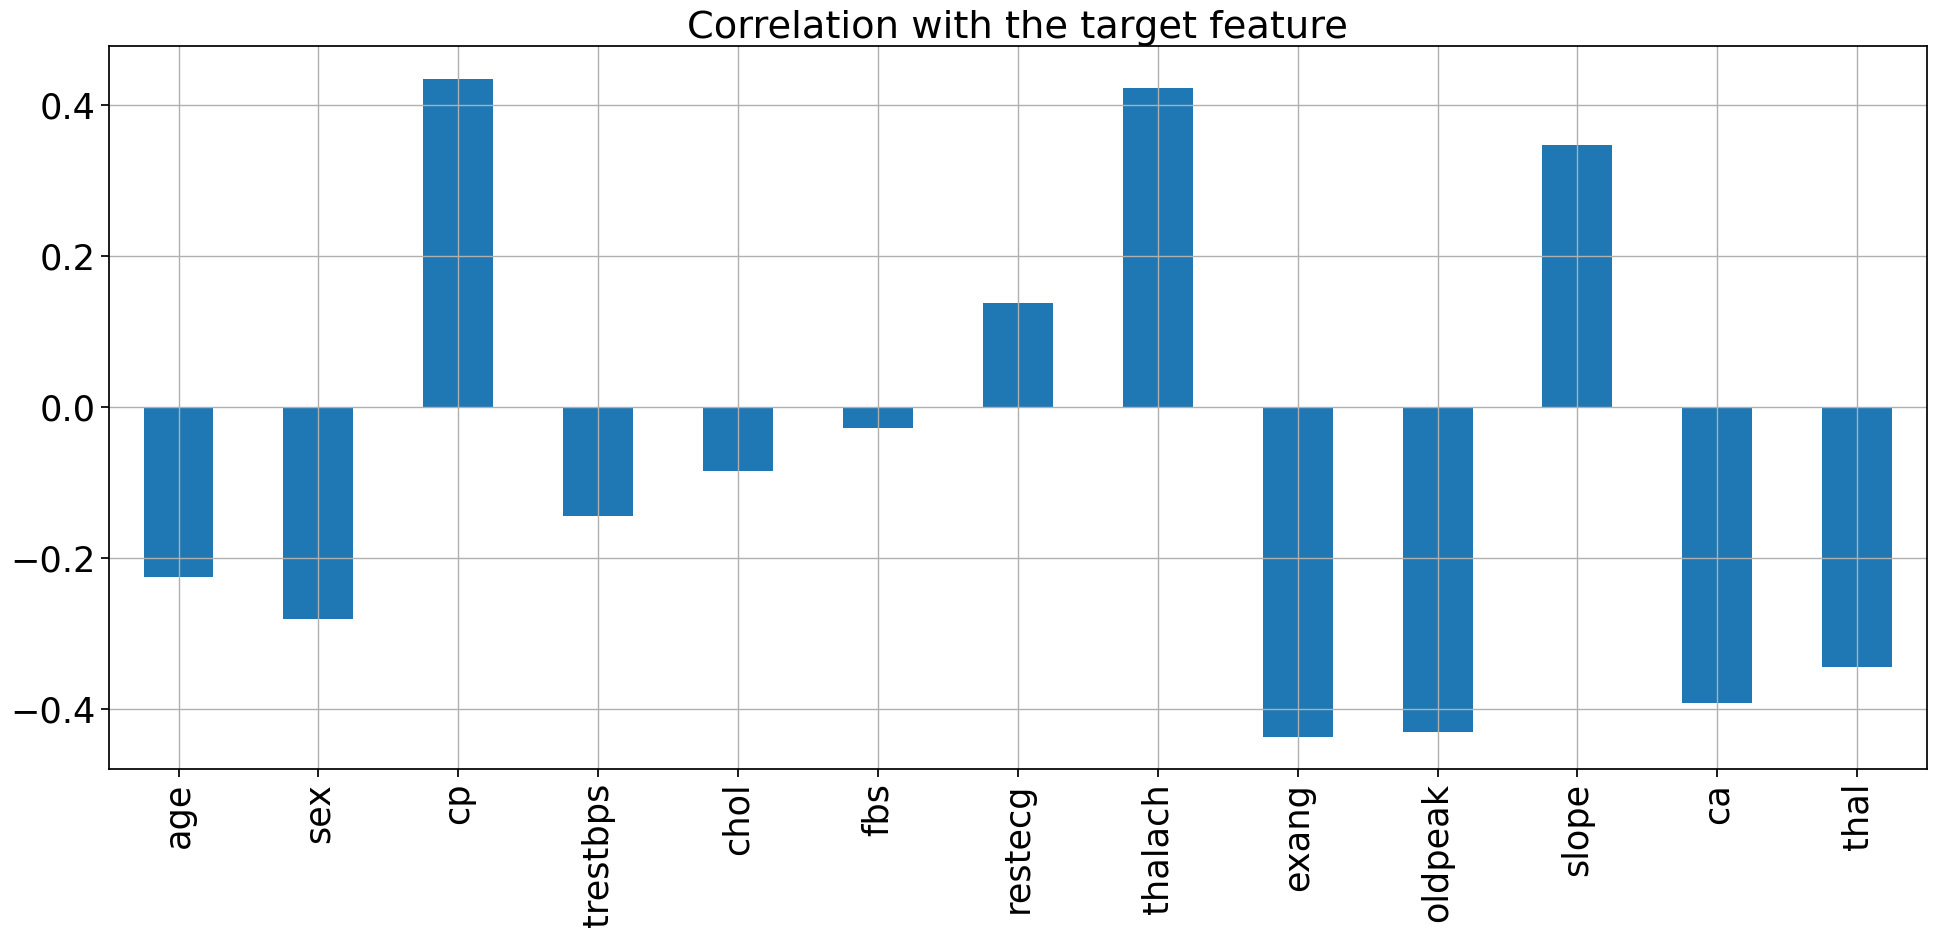

In [ ]:
sn.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10),
                                                        title="Correlation with the target feature")
plt.tight_layout()

#Decision Tree

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the feature columns
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

# Select the features and target variable
X = df[feature_cols]
y = df.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

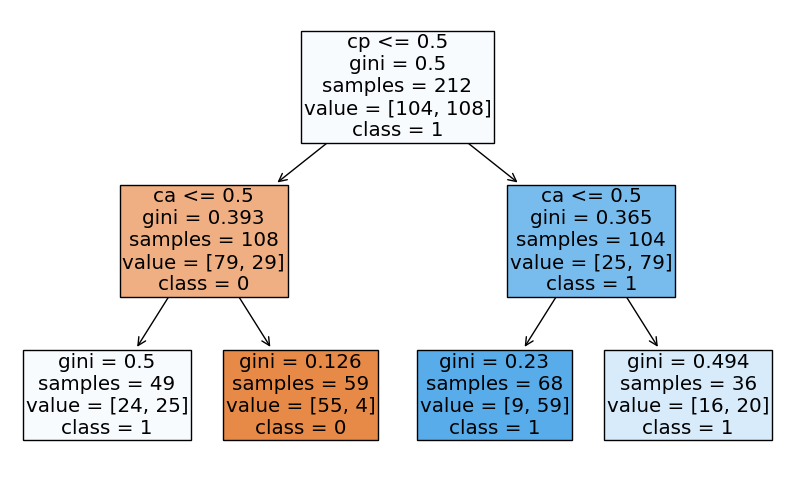

Accuracy: 0.8131868131868132


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(10, 6))

plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='black', label="data 1, auc=" + str(auc))  # Setting color to black
plt.legend(loc=4)
plt.show()


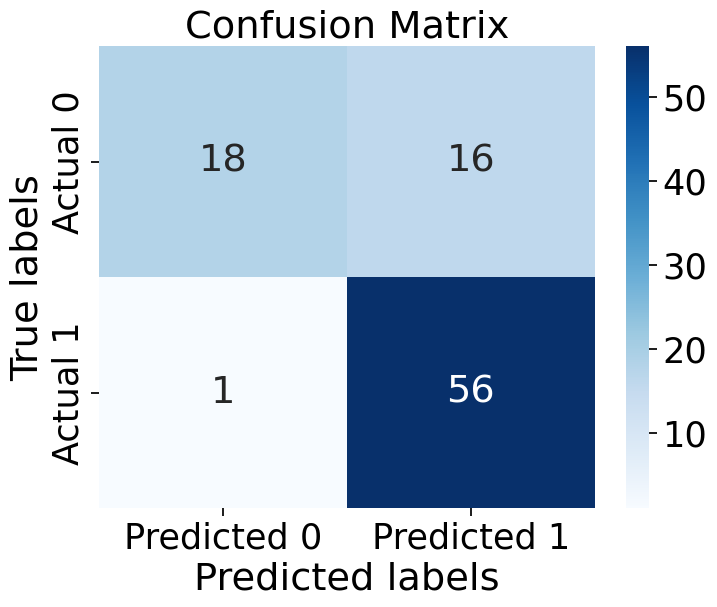

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example true labels and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, color= 'k', label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy: 0.6593406593406593


In [ ]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]
new_y = y_score
for i in range(len(y_score)):
  if new_y[i] >= 0.5:
    new_y[i] = 1
  else:
    new_y[i] = 0

fig = px.scatter(
    X_test, x="age", y="trestbps",
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

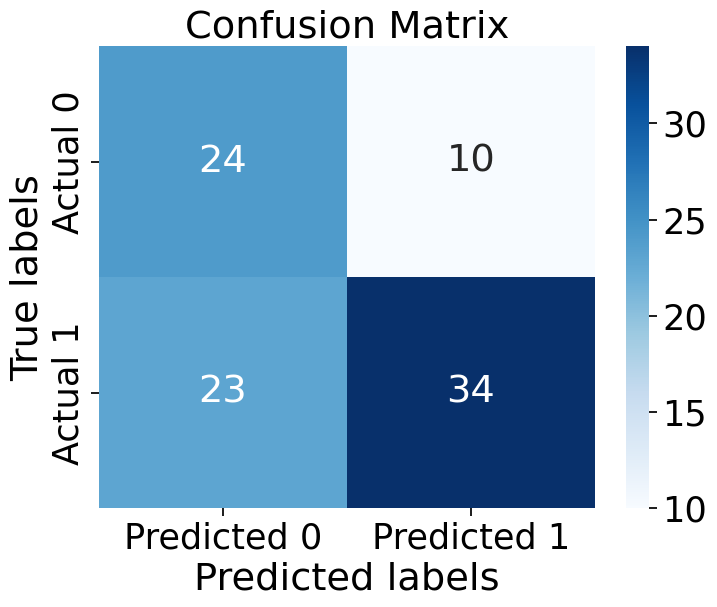

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example true labels and predicted labels
true_labels = y_test
predicted_labels = new_y

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

logreg = LogisticRegression(random_state=2, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
target_names = ['without heart disease', 'with heart disease']
print(classification_report(y_test, y_pred, target_names=target_names))
y_pred_proba = logreg.predict_proba(X_test)[::,1]
new_y = y_pred_proba
for i in range(len(y_pred_proba)):
  if new_y[i] >= 0.5:
    new_y[i] = 1
  else:
    new_y[i] = 0

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='black', label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


                       precision    recall  f1-score   support

without heart disease       0.79      0.76      0.78        34
   with heart disease       0.86      0.88      0.87        57

             accuracy                           0.84        91
            macro avg       0.82      0.82      0.82        91
         weighted avg       0.83      0.84      0.83        91



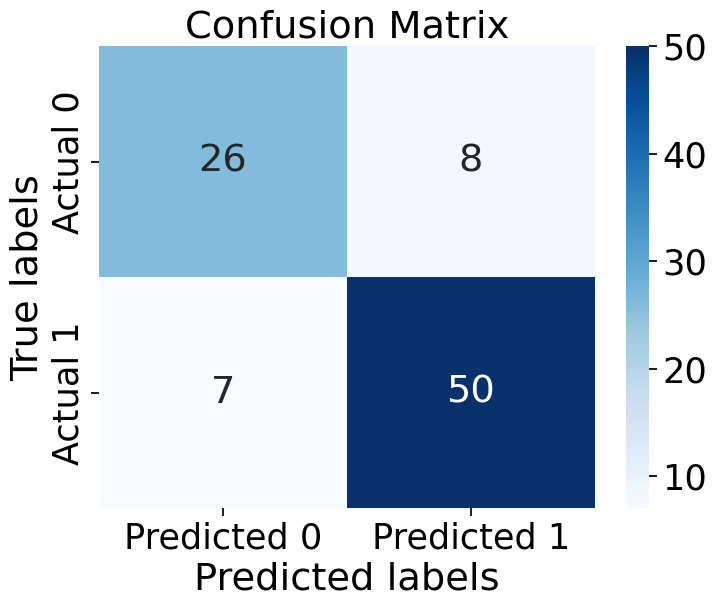

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example true labels and predicted labels
true_labels = y_test
predicted_labels = new_y

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression Visualization

In [ ]:
x= df['chol']
y=  df['target']
sn.regplot(x=x, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='chol', ylabel='target'>

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Assuming X_train, X_test, y_train, y_test are defined and GaussianNB model is trained

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
new_y = y_pred
for i in range(len(y_pred)):
    if new_y[i] >= 0.5:
        new_y[i] = 1
    else:
        new_y[i] = 0
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Generating sample data for plotting
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

# Plotting the scatter plot with larger size and a brighter colormap
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='spring')

plt.show()

Accuracy: 0.8241758241758241


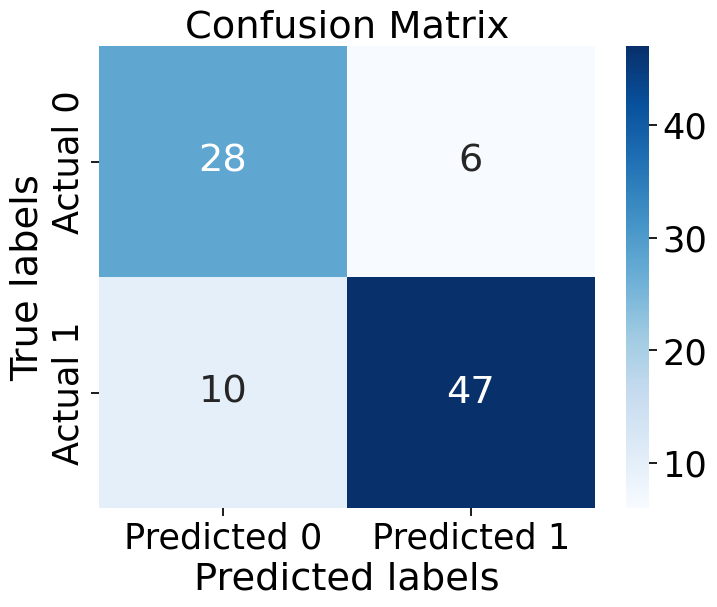

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example true labels and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Bar Chart

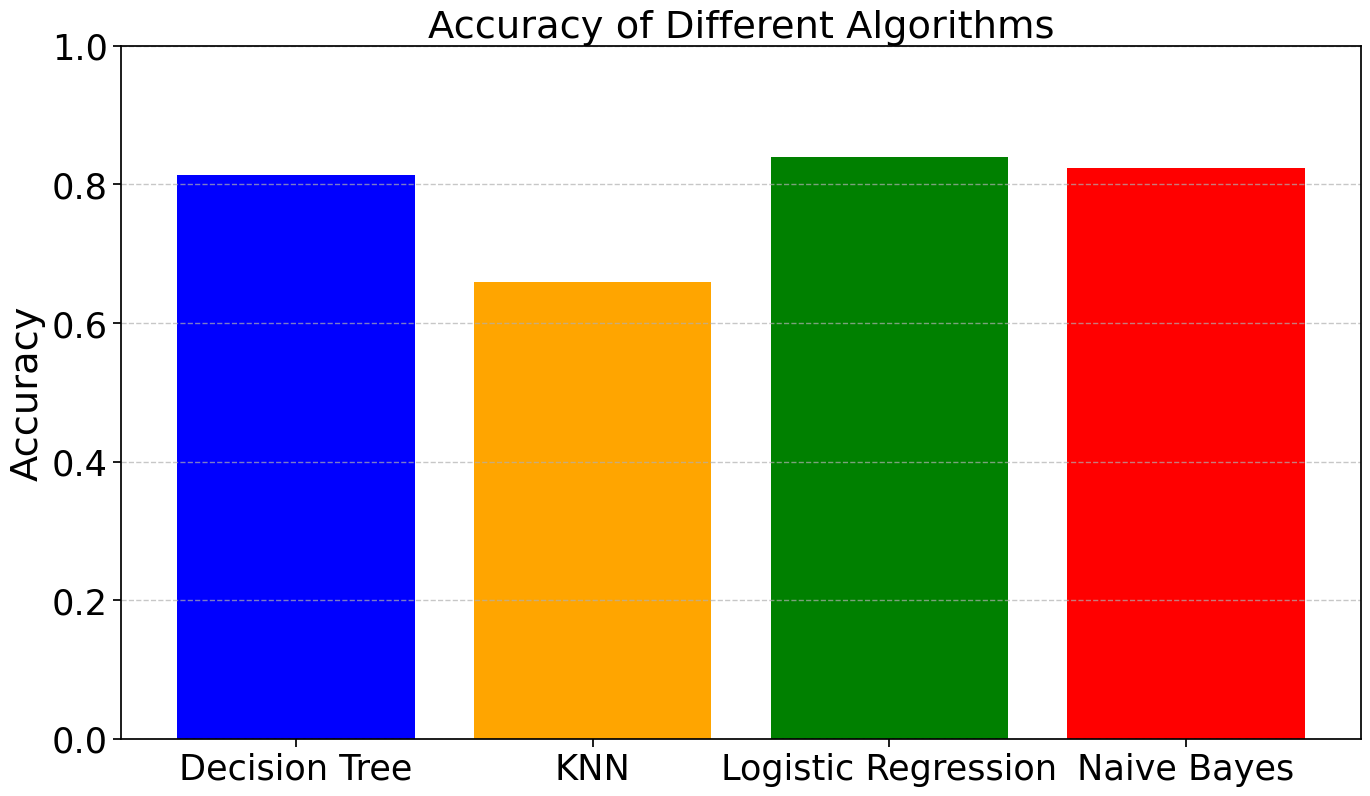

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Decision Tree', 'KNN', 'Logistic Regression', 'Naive Bayes']

# Accuracies
accuracies = [0.8131868131868132, 0.6593406593406593, 0.84, 0.8241758241758241]

# Plotting the bar chart
plt.figure(figsize=(16, 9))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red'])
#plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Setting y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()


Precision, recall comparison of 'Decision Tree', 'KNN', 'Logistic Regression', 'Naive Bayes'

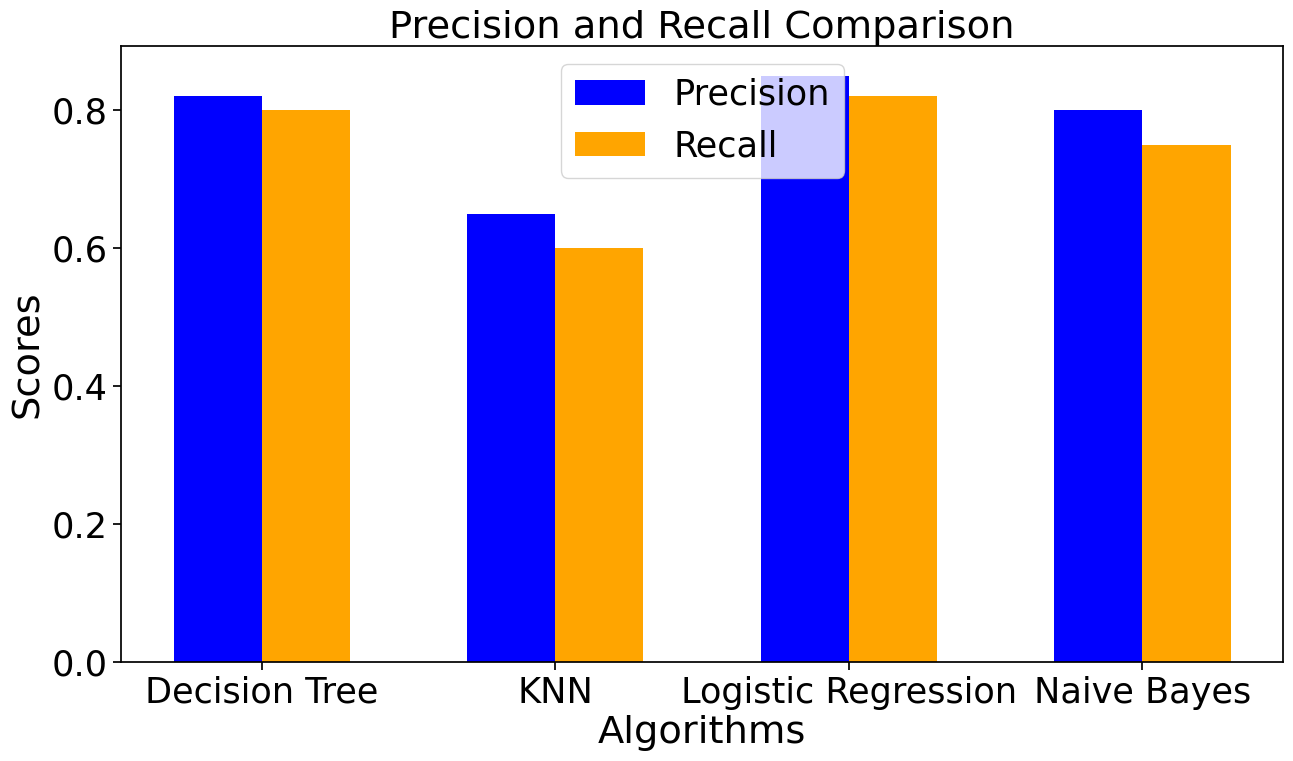

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Decision Tree', 'KNN', 'Logistic Regression', 'Naive Bayes']

# Precision and recall values for each algorithm
precision = [0.82, 0.65, 0.85, 0.80]
recall = [0.80, 0.60, 0.82, 0.75]

# Plotting the bar chart
plt.figure(figsize=(15, 8))

# Bar positions for precision and recall
bar_positions_precision = range(len(algorithms))
bar_positions_recall = [x + 0.3 for x in bar_positions_precision]

# Bar width
bar_width = 0.3

# Plotting precision
plt.bar(bar_positions_precision, precision, width=bar_width, color='blue', label='Precision')

# Plotting recall
plt.bar(bar_positions_recall, recall, width=bar_width, color='orange', label='Recall')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Precision and Recall Comparison')
plt.xticks([x + bar_width / 2 for x in bar_positions_precision], algorithms)
plt.legend()

plt.show()
